# Problem 1:
### Implement a higher-order integrator (either the trapezoidal rule or, preferably, Simpson’s rule). Use this integrator to repeat problem 3 from last problem set, that is, to numerically compute the following integral:

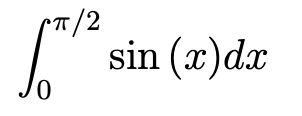

## Simpon's Rule:

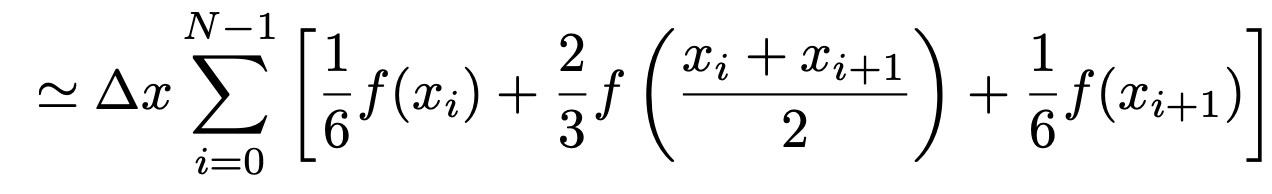

### Again, report this for a range of step sizes, with the number of steps N = 10, 102, 103, 104, 105, and again, determine how the fractional error decreases with decreasing step size (increasing N). How does this differ from the method used in the previous problem set?


In [4]:
#use simpson's rule to approximate the integral

#where dx = (xN - x0)/N 
#where xi = x0 + idx = idx
#where xi1 = x_(i+1) = (i+1)dx 
#where x = [0, pi/2]
#test with N = 10, 10**2, 10**3, 10**4, 10**5

# create a for loop where i varies between 0, N-1
# for each value of i compute the value of xi
# we have N equally spaced intervals 

import numpy as np
import math as m

i = 0
x0 = 0 #lower bound
xN = (m.pi/2) #upper bound

#create a large loop for all N values
for j in range (1,6):
   
    N = 10**j
    dx = ((xN - x0)/N) #delta x 

    #create function f(x)
    def f(x):
        return np.sin(x)

    #identify the values of i and place them in an array for later calculation 
    #initailize an empty array for the different values of i 
    ai = np.zeros(N) #array for values of i
    ai1 = np.zeros(N) #array for values of i+1

    for i in range(N): #prints i = [0,N-1]
        ai[i]=i
        ai1[i]=i+1
        i=i+1

    xi=ai*dx    #these values are correct and have been checked
    #print(xi)   

    xi1=ai1*dx  #these values are correct and have been checked
    #print(xi1)

    #execute the function f(x) for the different values of x

    #this is for the first section of the summation:
    #set p1 as the first part of the summation, (1/6)f(xi)
    p1 = (1/6)*f(xi) #these values are correct and have been checked


    #now we need to execute the function for (xi + xi1)/2 
    #set p2 as the second part of the summation, (2/3)f((xi+xi1)/2)
    #set y = the argument of the function, (xi+xi1)/2
    y = (xi+xi1)/2
    p2 = (2/3)*f(y) #these values are correct and have been checked


    #for the last section of the summation:
    #set p3 as the third part of the summation, (1/6)f(xi1)
    p3 = (1/6)*f(xi1) #these values are correct and have been checked


    #we will need to combine these arrays, adding them up for each index
    #set e as the array for the combined parts of the summation
    e = p1 + p2 + p3

    #now sum all the elements together and multiply by dx
    final = dx * np.sum(e)


    #for each final value, we need to calulate the fractional error 
    #fractional error = abs(true-estimate)/(true)
    #true value = 1
    error = (abs(1-final))/1
    print("estimate when N =", N,":")
    print(final)
    print("error = ",error)
    print( )

    #how does the error change as N increases?
    #error decreases exponentially as N increases 
    #this method can lead to an overestimation of the actual value

estimate when N = 10 :
1.0000002115465914
error =  2.115465913554715e-07

estimate when N = 100 :
1.0000000000211393
error =  2.1139312522677756e-11

estimate when N = 1000 :
1.000000000000002
error =  1.9984014443252818e-15

estimate when N = 10000 :
0.9999999999999999
error =  1.1102230246251565e-16

estimate when N = 100000 :
0.9999999999999997
error =  3.3306690738754696e-16



# Problem 2:
### In problem set 1, you evaluated an analytic function which gave you the ratio of the obscured to unobscured flux of a star during a planetary transit. This was done for a star with a uniform brightness across its disk. However, most stars are actually brighter in their centers and dimmer at their edges – a feature known as limb darkening.1 This limb darkening can be parameterized with the function I(r), which is the intensity of the sun’s surface as a function of radius r (or alternately angle θ – see Fig. 1a of Problem set 1).
### This makes the transit calculation more complicated2 and we need to evaluate the ratio of two integrals:

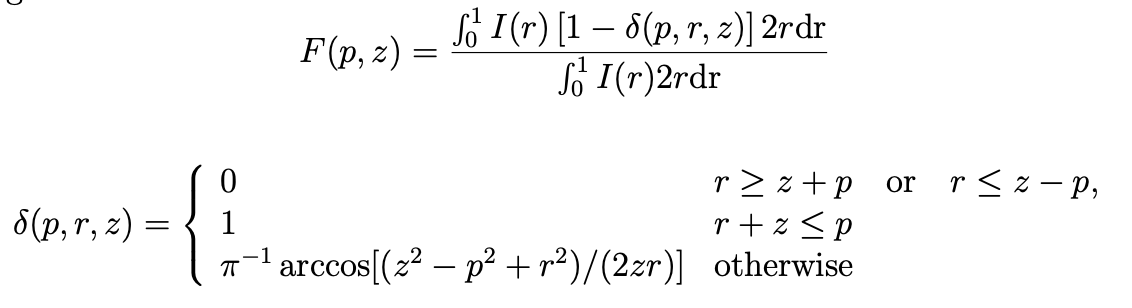

### Use the integrator from the first problem of this problem set to evaluate this function. Note that it will require two integrals for each evaluation of F(p,z). In particular, I want you to evaluate F(p,z) using no limb-darkening (i.e. I(r) = 1). Do this for the values p = 0.2 and z = 0.9 and, again, try using different numbers of steps to calculate the integral: N = 10, 102, 103, 104, 105. How does the fractional error decrease as N increases? Use the analytic formula in the first problem set to check your result.

In [7]:

import numpy as np
import math as m

# p and z are defined, r is varying from [0,1]
p = 0.2
z = 0.9

i = 0
r0 = 0 #lower bound
rN = 1 #upper bound

#create a large loop for all N values
for j in range (1,6): 
    N = 10**j
    delta_r = ((rN - r0)/N) #delta r = 1/N

    #define function I(r)
    def I(r):
        return (1)

    #define function f_num(r) for the numerator
    #f_num(r) depends on delta(p,r,z) which varies with r, therefore we need to define cases for the values of r
    # define delta(p,r,z) as d 
    def f_num(r):
        case1 = (r>=(z+p)) or (r<=(z-p))
        case2 = ((r+z)<=p)
        #case 3 is otherwise
        r=round(r,3)

        if (case1):
            # r < 0.7
            d = 0
            c = 1 - d
        elif (case2): 
            #this is not possible 
            # r cannot be negative
            d = 1
            c = 1 - d
        else:
            #case 3
            # 0.7 < r < 1.1
            d = (((m.pi)**(-1))*(m.acos(((z**2)-(p**2)+(r**2))/(2*z*r))))
            c = 1 - d
        return (I(r)*c*2*r)
    
    #define funciton f_den(r) for the denominator
    def f_den(r):
        return (I(r)*2*r)

    #identify the values of i 
    #for each value of i, run through an iteration of the summation
    #this means we need a loop for all values of i
    #for each interation of the loop, we will continue to add to the summation
    #this is a quicker method than the array method used in problem 1
    
    sum_num = 0
    sum_den = 0

    for i in range(N): #returns i = [0,N-1]
        ri = i * delta_r
        ri1 = (i+1)*delta_r
        p1_num = (1/6)*f_num(ri)
        p1_den = (1/6)*f_den(ri)
        y = (ri+ri1)/2
        p2_num = (2/3)*f_num(y) 
        p2_den = (2/3)*f_den(y)
        p3_num = (1/6)*f_num(ri1)
        p3_den = (1/6)*f_den(ri1)
        e_num = p1_num + p2_num + p3_num
        e_den = p1_den + p2_den + p3_den
        sum_num = sum_num + e_num
        sum_den = sum_den + e_den
        i = i+1

    final_num = delta_r * sum_num
    final_den = delta_r * sum_den

    #define the ratio of the integrals as F
    F = final_num / final_den
    #print(F)
    
    #for each final value, we need to calulate the fractional error 
    #fractional error = abs(true-estimate)/(true)
    #true value = 1
    error = (abs(1-final))/1

    print("estimate when N =",N,":")
    print(F)
    print("error =",error)
    print()

estimate when N = 10 :
0.968742004851439
error = 3.3306690738754696e-16

estimate when N = 100 :
0.9684272016510477
error = 3.3306690738754696e-16

estimate when N = 1000 :
0.9685551000805322
error = 3.3306690738754696e-16

estimate when N = 10000 :
0.9684395474815098
error = 3.3306690738754696e-16

estimate when N = 100000 :
0.9684223793678481
error = 3.3306690738754696e-16



# Problem 3:
### Use a Monte-Carlo integration to evaluate the same integrals as in the last problem (again assuming I(r) = 1). To do this, generate N random x and y values that are each drawn from a uniform distribution from -1 to 1 (so that you are picking random points inside a box that covers the unit circle). Reject points that lie outside the unit circle (i.e. for which x2 + y2 > 1). Call the number of accepted points N1. In addition, count how many of the accepted points lie within the eclipsing planet disk (i.e. for which (x − z)2 + y2 < p2) and call that number N2. Then an estimate for F(p,z) is the ratio of points inside the star’s disk that do not lie in the planet’s disk to the number of points inside the star’s disk (without the planet): F (p, z) ≈ (N1 − N2)/N1.
### Evaluate this for the same p and z values as above. Again repeat for the same range of N values and determine how the error decreases with N. What effective order is this method?

In [5]:
# for monte carlo integration, we need to generate random numbers that fall within a function
# we need to choose random points in which the integrand is evaluated
# generate N random x and y values, each between [-1,1] = N1
# then we need the numbers that fall within the disk of the planet = N2
# estimate F(p,z) as the ratio of these points

import numpy as np
import random as r

p = 0.2
z = 0.9


countN1 = 0 #counter for number of accepted N1 values
countN2 = 0 #counter for number of accepted N2 values

for j in range (1,6):
    N=10**j

    

    for w in range(N): #produces N different coordinates
        #producing random values of (x,y)  
        x = r.uniform(-1,1)
        y = r.uniform(-1,1)

        if (((x**2)+(y**2))>1):  
            #doesn't satisfy condition
            #go to the next interation of the loop
            continue
        elif (((x**2)+(y**2))<=1):
            #satisfies condition for N1
            countN1 = countN1 +1
            if ((((x-z)**2)+(y**2))<(p**2)):
                #satisfies condition of N2
                countN2 = countN2 +1
            
        w = w + 1


    F = (countN1 - countN2)/(countN1)
    
    #for each final value, we need to calulate the fractional error 
    #fractional error = abs(true-estimate)/(true)
    #true value = 1
    error = (abs(1-final))/1
    #print(error)
    print("for N =",N,":")
    print("N1 =",countN1)
    print("N2 =",countN2)
    print("F(p,z) =",F)
    print("error =",error)
    print()

    

for N = 10 :
N1 = 8
N2 = 1
F(p,z) = 0.875
error = 3.3306690738754696e-16

for N = 100 :
N1 = 86
N2 = 4
F(p,z) = 0.9534883720930233
error = 3.3306690738754696e-16

for N = 1000 :
N1 = 867
N2 = 29
F(p,z) = 0.9665513264129181
error = 3.3306690738754696e-16

for N = 10000 :
N1 = 8714
N2 = 284
F(p,z) = 0.9674087675005738
error = 3.3306690738754696e-16

for N = 100000 :
N1 = 87229
N2 = 2726
F(p,z) = 0.9687489252427518
error = 3.3306690738754696e-16

